In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [28]:
#!pip install tensorflow


In [29]:
# Import necessary libraries
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input
from keras.layers import Reshape, concatenate

(288, 432, 3)
(238, 382, 3)


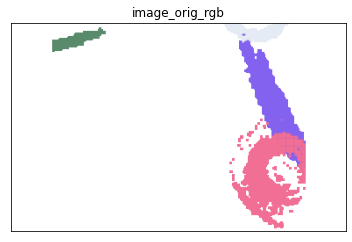

In [43]:
path="./data/brush_strokes/02_paintings/"
nameInFile="paint_00001.png"

image = cv2.imread(path + nameInFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)


height, width = image.shape[:2]

# Define the border size (in pixels) to be removed
border_size = 25

# Crop the image using indexing
image = image[border_size:height-border_size, border_size:width-border_size]
print(image.shape)
#width = int(image.shape[1] * (1 + bs_scale / 100))
#height = int(bs_k.shape[0] * (1 +  bs_scale / 100))
#print(bs_k.shape[0],bs_k.shape[1])
#bs_k = cv2.resize(bs_k, (width, height))

#plt.axis([0, image.shape[0],0, image.shape[1]])
#plt.gca().set_aspect('equal', adjustable='box')




plt.gca().get_yaxis().set_visible(False)
plt.gca().get_xaxis().set_visible(False)

plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()

In [6]:
type(image)

numpy.ndarray

In [7]:
image.shape

(500, 739, 3)

In [ ]:
# Import necessary libraries for colour RGB input

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Input

# Define the architecture of the model
input_shape = (256, 256, 3) # assuming the images are 256x256 RGB images
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', padding='same', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(UpSampling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3), activation='linear', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on your dataset
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=50)

# Use the trained model to make predictions on new images
predicted_depths = model.predict(X_test)


In [ ]:
# Define the architecture of the model for grey input


input_shape = (256, 256, 1) # assuming the images are 256x256 grayscale images
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

# Encoder-Decoder structure
model.add(UpSampling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(1, (3,3), activation='linear', padding='same'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on your dataset
model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=50)

# Use the trained model to make predictions on new images
predicted_depths = model.predict(X_test)


https://stackoverflow.com/questions/59930637/how-can-i-train-a-model-with-different-image-shapes-in-a-batch
import cv2
import glob
import os
import numpy as np


paint_path = './data/brush_strokes/02_paintings/' 

try:                                        # making the destination folder
    if not os.path.exists(paint_path):
        os.makedirs(paint_path)
except OSError:
    print ('Error while creating directory')


resolution = (256, 256) # use your desired resolution

for img_path in glob.glob(paint_path + '*.jpng'): 

    img = cv2.imread(img_path)

    if img is None:  # checking if the read image is not a NoneType
        continue

    img = cv2.resize(img, resolution) # the image will be zoomed in or out depending on the resolution

    cv2.imwrite(destination + 'resize_' +  + '.png', img)

    image_no = image_no + 1